In [1]:
# Facebook data mining bootcamp !!!
# HCS Bootcamp 1 by Yooni Park and John Hwang

# important imports 
import os
import json
import numpy as np
import pylab as pl
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from heapq import nlargest


In [2]:
# globals 

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 700
MESSAGE_THRESHOLD = 0


In [3]:
# get json data for the individual chats in your messages folder 

def get_json_data(chat):
    try:
        # you may need to change the directory path, depends on where you've downloaded your fb messages to. 
        json_location = CURRENT_DIRECTORY + "/messages/inbox/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)


    
# create new globals for data to be plotted 
chats = os.listdir(CURRENT_DIRECTORY + "/messages/inbox")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0



print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')


Analyzing 700 chats...


In [4]:
# sort data into new gobals 

for chat in chats:
    url = chat
    json_data = get_json_data(chat)

    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Finished processing chats...


In [5]:
# continue sorting messages into the new globals (dictionaries)
# you may have to alter this code a bit depending on what functions you would like to add

tireds = {}
swearers = {}
commonexchanges = {}
invalidmessages = {}

for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i+1) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.utcfromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
            
            if 'im tired' in message_content:
                if name in tireds:
                    tireds[name] += 1
                else:
                    tireds[name] = 1
                    
            if 'shit' or 'fuck' or 'damn ' or 'gaeshekki' or 'shippar' or 'hell' or 'shekki' or 'motherfucker' in message_content:
                if name in swearers:
                    swearers[name] += 1
                else:
                    swearers[name] = 1
                    
            if message_content in commonexchanges:
                commonexchanges[message_content] += 1
            else:
                commonexchanges[message_content] = 1
                
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

    

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

1 - 10000 messages - yoonipark_wg0stbnumw
2 - 10000 messages - vivianli_9qowrys4wg
3 - 10000 messages - trashtalkcentral_9uqejpaorg
4 - 10000 messages - summoningtheghostofelgordo_wdm_hb9phq
5 - 10000 messages - seohyunyoo_sccpqnnlfq
6 - 10000 messages - oofasasquad_sxvngz8zga
7 - 10000 messages - monkas_cu94xyhbgq
8 - 10000 messages - jeffreychang_ef9g3e1auq
9 - 10000 messages - graduationtriptojapan2019_ao52rm08ag
10 - 10000 messages - facebookuser_o4spauwyta
11 - 10000 messages - clammycaiyoatsfrilmandlitblumsofrieblumnathanjhonsonfilm_olvnumjyqa
12 - 10000 messages - circle_fajofq2ywq
13 - 10000 messages - chanseolee_bp1ee9rama
14 - 10000 messages - bball_ycao8y12ba
15 - 10000 messages - apchemnomutateduraniumpls_tu4ommkohw
16 - 10000 messages - alexanderlu_qaobcxc8fq
17 - 10000 messages - NonLucasNewLegitGoodChristiansexposayedGrandeBlancosChatTheUnionThomasConfederacy_L94obBkR_Q
18 - 8803 messages - jenlo_xuvk0ypgkq
19 - 8761 messages - bruisescrewcaltechandcornellandprincetonand

206 - 175 messages - asrpclub_iy6peli6jq
207 - 166 messages - factbouncers_ppqkjd802w
208 - 159 messages - patriclee_oez_jbcurq
209 - 159 messages - lingyuanandkyleyuan_jvqgcah6ng
210 - 157 messages - ashlanahmed_2n8q6wyxfw
211 - 156 messages - renaudledonne_esb5230q4g
212 - 155 messages - edgarfu_yjvlq3tocw
213 - 154 messages - jeffreychangchanseoleestanleywuandkevinzhou_qctgvpym6w
214 - 152 messages - diplomacychat_vcrmwbh6la
215 - 150 messages - craige_clgfdf6r3q
216 - 144 messages - bionotes_pyvyxcizqa
217 - 143 messages - df13frabbotabbotphysics_kiffbm8q6w
218 - 141 messages - kingmath2honors_apf7djx6yq
219 - 139 messages - seniorgifts_mzqakfxvxq
220 - 136 messages - jonathanliu_ftlkxn2uww
221 - 136 messages - heatheryun_utiu25s2ja
222 - 135 messages - seanwu_0zgerggtrq
223 - 133 messages - minecraftmonkeys_9iukoyxl5a
224 - 132 messages - liarspokerqdoba_f32ecro31a
225 - 131 messages - kevinyejoannewangarielleleeand4others_cnzuc8kewa
226 - 131 messages - bruceliuhyunwooshinjohnkim

449 - 10 messages - lucassurfacepro4_wrwfowqm1w
450 - 10 messages - lucaspcgamingsetupforsale_yrasp5m0lq
451 - 10 messages - lucasibuypowergamingdesktopintelcorei58gbmemorynvidiageforcegtx10601tbharddrive_qjzsvcnoww
452 - 10 messages - lucasfreeechodotalexa_lrxffn_qpq
453 - 10 messages - fakelegitgrandeblancoschat_ibgyoau-ca
454 - 9 messages - willsteinfeld_fmpsnh-vzw
455 - 9 messages - priscillanguyen_y8imfl9x9a
456 - 9 messages - michellepak_yk3beogspq
457 - 9 messages - lucasnintendo3dsxlwithpokemonxandpokemonalphasapphire_o1c86wa4cq
458 - 9 messages - lucasgamecubecontrolleradapterforsupersmashbronintendoswitch_09h0aliygq
459 - 9 messages - lucascorsairstrafemechanicalgamingkeyboard_hfdgqtdb8q
460 - 9 messages - lucascomputergamming_fbgvgt9-kq
461 - 9 messages - idodinnar_knvsfgahwa
462 - 9 messages - franklinwangyimingzhengandrewzhangand2others_iq-neqbc0a
463 - 9 messages - amansaiju_nbm_zrt-ag
464 - 8 messages - unonow_ge-rnnqrgg
465 - 8 messages - lucasoculusrifttouchvirtualreal

634 - 1 messages - joshualee_envupknwja
635 - 1 messages - jonathanli_2amajmipgw
636 - 1 messages - johnguo_og-y0eaxka
637 - 1 messages - jeffreyyeung_xaerojmaxa
638 - 1 messages - jayhealy_va9ccau8fg
639 - 1 messages - jasperliu_-mibcjuwqw
640 - 1 messages - jasonwong_lrckklheow
641 - 1 messages - jaehochung_vb00xvcl8w
642 - 1 messages - jacobtan_ausllnwdvw
643 - 1 messages - ianconrad_wcoqgelmzw
644 - 1 messages - hyunwooraymondkwon_v-3allroyq
645 - 1 messages - huiningliang_vnlwuh5yxw
646 - 1 messages - henrylu_u7eagtrx5a
647 - 1 messages - hannahoh_mpfvetnigw
648 - 1 messages - hannahlin_cqrgmupgdg
649 - 1 messages - graceabe_i_d_253xbg
650 - 1 messages - gillianseed_era5a3lhzq
651 - 1 messages - gabecraig_qcirnrkksq
652 - 1 messages - francescamei_wzgts3vspw
653 - 1 messages - facebookuser_xw6devdolg
654 - 1 messages - ericzhang_u6p4hspw6g
655 - 1 messages - erictang_njnsjqzdpq
656 - 1 messages - emmetsherman_m0lgurp88a
657 - 1 messages - emilyqiu_tmyt0ldz9w
658 - 1 messages - emi

In [6]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = []
        for time in person_to_times[person]:
            plotted_data.append(time)
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()
    
def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    #plot_histogram_time(chat_number)
    #plot_histogram_words(chat_number)


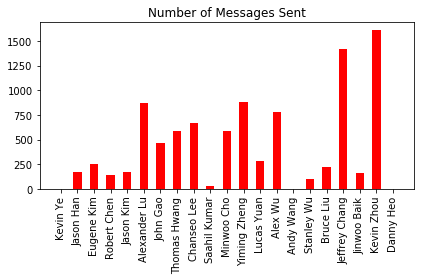

In [7]:
plot(16)

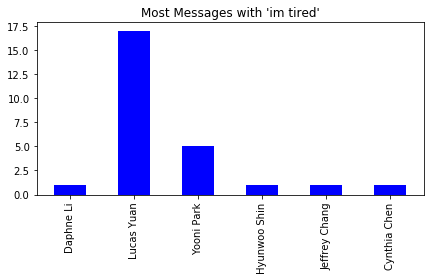

In [8]:
def find_phrase ():
    X = np.arange(len(tireds))
    pl.bar(X, list(tireds.values()), align='center', width=0.5, color = 'b')
    pl.xticks(X, tireds.keys(), rotation = 90)
    pl.title('Most Messages with \'im tired\'')
    pl.tight_layout()
    pl.show()

find_phrase()

In [9]:
print('People w/ most foul language: ' + str(nlargest(3, swearers, key = swearers.get)))

People w/ most foul language: [u'Lucas Yuan', u'Jeffrey Chang', u'Kevin Zhou']


In [10]:
print('Most common exchanges: ' + str(nlargest(3, commonexchanges, key = commonexchanges.get)))

Most common exchanges: [u'LOL', u'lol', u'?']


In [11]:
def message_times(chat_number):
    timestamps = []
    messages = sorted_chats[chat_number][2]
    name = sorted_chats[chat_number][1]
    for message in messages:
        timestamp = message['timestamp_ms']
        time_data = datetime.fromtimestamp(timestamp/1000.0)
        hour = time_data.hour
        timestamps.append(hour)
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('Plot of Common Message Times')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    pl.hist(timestamps, 100, alpha=0.3, label=name, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

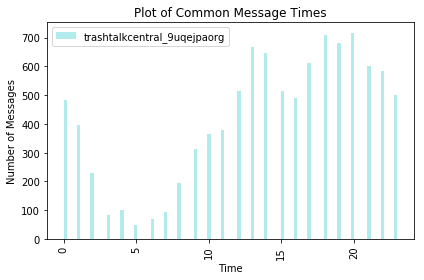

In [12]:
message_times(2)